In [1]:
import pandas as pd
import numpy as np
import h5py

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
cd /home/chenxupeng/projects/emaize/

/home/chenxupeng/projects/emaize


In [30]:
phenotypes = pd.read_table('pheno_emaize.txt')
pedigree = phenotypes['pedigree'].str.split('_', expand=True)
pedigree.columns = ['f', 'X', 'm']
phenotypes = pd.concat([phenotypes, pedigree], axis=1)
phenotypes['number'] = np.arange(phenotypes.shape[0])
parent_table = phenotypes.pivot_table(values='number', index=['m'], columns=['f'], dropna=False)
male_ids = ['m%d' % i for i in range(1, parent_table.shape[0] + 1)]
female_ids = ['f%d' % i for i in range(1, parent_table.shape[1] + 1)]
parent_table = parent_table.loc[male_ids, female_ids]

In [31]:
parent_table

f,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f198,f199,f200,f201,f202,f203,f204,f205,f206,f207
m,,,,,,,,,,,,,,,,,,,,,
m1,0,1,2,3,4,5,6,7,8,9,...,4762,4764,4756,4761,4763,5050,5051,5052,5053,5054
m2,191,192,193,195,196,197,198,199,200,201,...,333,379,4767,4768,4777,5055,5056,5057,5058,5059
m3,380,381,382,384,385,386,387,388,389,390,...,520,569,442,4786,4789,5060,5061,5062,5063,5064
m4,570,571,572,574,575,576,577,578,579,580,...,4797,4802,633,4796,4800,5065,5066,5067,5068,5069
m5,759,760,761,763,764,765,766,767,768,769,...,901,4814,4805,835,4813,5277,5278,5279,5280,5281
m6,949,950,951,953,954,955,956,957,958,959,...,4824,1137,4818,4822,4827,5489,5490,5491,5492,5493
m7,1138,1139,1140,1142,1143,1144,1145,1146,1147,1148,...,4838,1326,4831,4837,4840,5494,5495,5496,5497,5498
m8,1327,1328,1329,1331,1332,1333,1334,1335,1336,1337,...,4848,1517,4842,1405,4851,5499,5500,5501,5502,5503
m9,1518,1519,1520,1522,1523,1524,1525,1526,1527,1528,...,1659,1707,4855,4861,4863,5504,5505,5506,5507,5508


In [43]:
table = np.array(parent_table)[:25,:202].astype('int')
table[np.where(table >4754)] = 10000
table = table.astype('S')
for i in range(4750):
    table = table.flatten()
    if len(table[i]) <4:
        table[i] = (4 - len(table[i]))*'0'+table[i]
table = table.reshape(25,202)
table = np.core.defchararray.add('L',table)

In [44]:
table

array([['L0000', 'L0001', 'L0002', ..., 'L10000', 'L10000', 'L10000'],
       ['L0191', 'L0192', 'L0193', ..., 'L10000', 'L10000', 'L10000'],
       ['L0380', 'L0381', 'L0382', ..., 'L0442', 'L10000', 'L10000'],
       ..., 
       ['L4183', 'L4184', 'L4185', ..., 'L4248', 'L4264', 'L10000'],
       ['L4375', 'L4376', 'L4377', ..., 'L10000', 'L10000', 'L10000'],
       ['L4564', 'L4565', 'L4566', ..., 'L10000', 'L10000', 'L10000']],
      dtype='|S22')

In [45]:
def random():
    row = np.arange(0,25)
    column = np.arange(0,202)
    row = np.random.choice(row,5,replace=False)
    column = np.random.choice(column,5,replace=False)
    row_index = table[row,:]
    col_index = table[:,column]
    
    s0 = np.intersect1d(row_index,col_index)
    s0 = s0[np.where(s0 != 'L10000')]
    total = np.union1d(row_index.flatten(),col_index.flatten())
    total = total[np.where(total != 'L10000')]
    s1f = np.setdiff1d(row_index,s0)
    s1f = s1f[np.where(s1f != 'L10000')]
    s1m= np.setdiff1d(col_index,s0)
    s1m = s1m[np.where(s1m != 'L10000')]
    train = np.setdiff1d(table,total)
    train = train[np.where(train != 'L10000')]
    return total,s1f,s1m,s0,train,row_index,col_index,row,column

In [46]:
a1,a2,a3,a4,a5,a6,a7,a8,a9 = random()

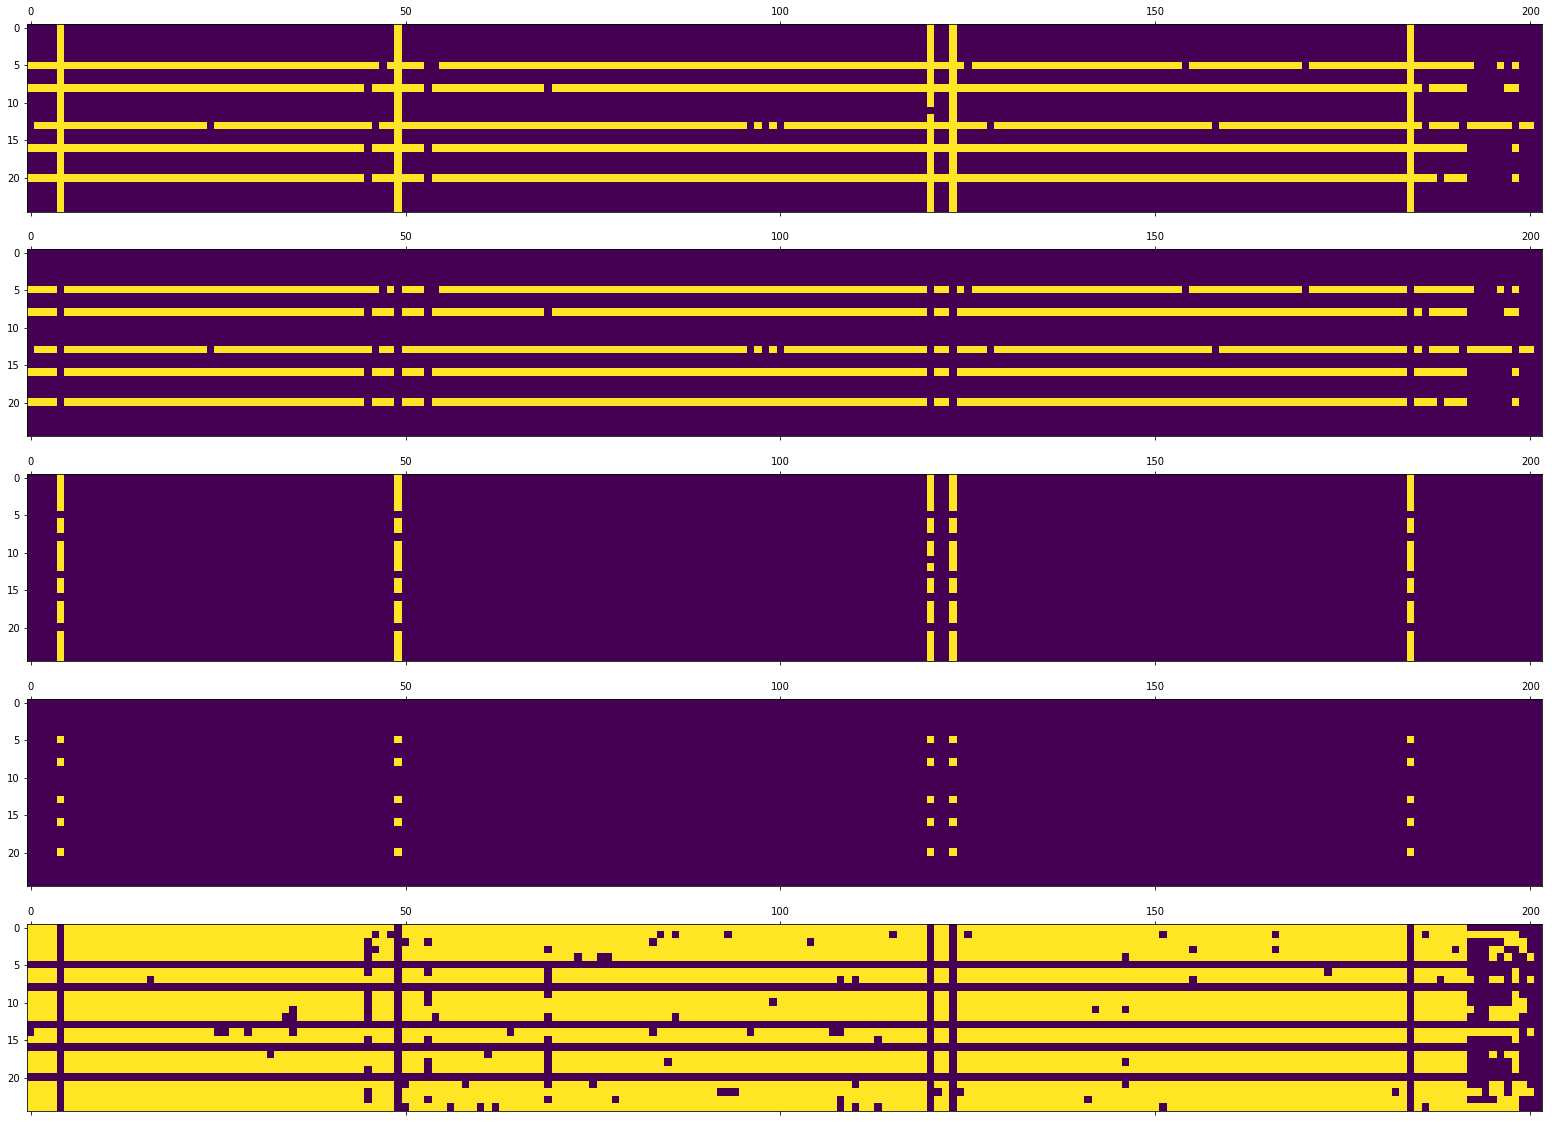

In [47]:
fig, ax = plt.subplots(5, figsize=(40,20))
ax[0].matshow(np.isin(table,a1))
ax[1].matshow(np.isin(table,a2))
ax[2].matshow(np.isin(table,a3))
ax[3].matshow(np.isin(table,a4))
ax[4].matshow(np.isin(table,a5))

In [49]:
total_ = np.array([]).astype('S')
s1f_ = np.array([]).astype('S')
s1m_=np.array([]).astype('S')
s0_ = np.zeros([]).astype('S')
train_ = np.array([]).astype('S')
with h5py.File('cross_sampling2') as f:
    for i in range(1000):
        a1,a2,a3,a4,a5,a6,a7,a8,a9 = random()
        f.create_dataset(str(i)+'/test',data = a1)
        f.create_dataset(str(i)+'/s1f',data = a2)
        f.create_dataset(str(i)+'/s1m',data = a3)
        f.create_dataset(str(i)+'/s0',data = a4)
        f.create_dataset(str(i)+'/train',data = a5)
        f.create_dataset(str(i)+'/row_ind',data = a6)
        f.create_dataset(str(i)+'/col_ind',data = a7)
        f.create_dataset(str(i)+'/row',data = a8)
        f.create_dataset(str(i)+'/col',data = a9)

In [10]:
f = h5py.File('cross_sampling1')

In [64]:
import pickle
def table_(x):
    with open('/home/chenxupeng/projects/emaize/new_cv_/'+str(x)+'/r2_pcc_dict/gpr.dct','rb') as fi:
        d = pickle.load(fi)

    c = {}
    traits = ['trait1','trait2','trait3']
    keys = ['pcc_test_fm','pcc_test_f','pcc_test_m','pcc_test','pcc_train']
#models = ['lr','xgbr','ridge','kr','knr','rfr','gpr']
    models = ['gpr']
    for trait in traits:
        c[trait] = {}
    for key in keys:
        for trait in traits:
            c[trait][key] = {}
    for model in models:
        for trait in traits:
            for key in keys:
                if key in ['pcc_test_fm','pcc_test_f','pcc_test_m','pcc_test','pcc_train']:
                    c[trait][key][model] = d[model][trait][key][0]
                else:
                    c[trait][key][model] = d[model][trait][key]

    m = pd.DataFrame.from_dict({(i,j): c[i][j] 
                           for i in c.keys() 
                           for j in c[i].keys()},
                       orient='index')
    return m

In [66]:
sum1 = np.array([])
sum2 = np.array([])
sum3 = np.array([])
for i in range(4):
    sum1= np.concatenate((sum1,table_(i).iloc[0]))
    sum2 =np.concatenate((sum2,table_(i).iloc[5]))
    sum3=np.concatenate((sum3,table_(i).iloc[10]))

(array([ 1.,  1.,  0.,  1.,  3.,  0.,  1.,  1.,  0.,  3.,  2.,  3.,  4.,
         3.,  6.,  3.,  4.,  3.,  5.,  3.,  4.,  3.,  8.,  4.,  2.,  4.,
         5.,  5.,  5.,  9.,  6.,  7.,  6.,  9.,  5.,  5.,  2.,  6.,  3.,
         2.,  6.,  2.,  6.,  1.,  2.,  1.,  0.,  3.,  0.,  2.]),
 array([ 0.44030383,  0.44745616,  0.4546085 ,  0.46176084,  0.46891318,
         0.47606551,  0.48321785,  0.49037019,  0.49752252,  0.50467486,
         0.5118272 ,  0.51897953,  0.52613187,  0.53328421,  0.54043654,
         0.54758888,  0.55474122,  0.56189356,  0.56904589,  0.57619823,
         0.58335057,  0.5905029 ,  0.59765524,  0.60480758,  0.61195991,
         0.61911225,  0.62626459,  0.63341692,  0.64056926,  0.6477216 ,
         0.65487394,  0.66202627,  0.66917861,  0.67633095,  0.68348328,
         0.69063562,  0.69778796,  0.70494029,  0.71209263,  0.71924497,
         0.7263973 ,  0.73354964,  0.74070198,  0.74785432,  0.75500665,
         0.76215899,  0.76931133,  0.77646366,  0.783616  ,

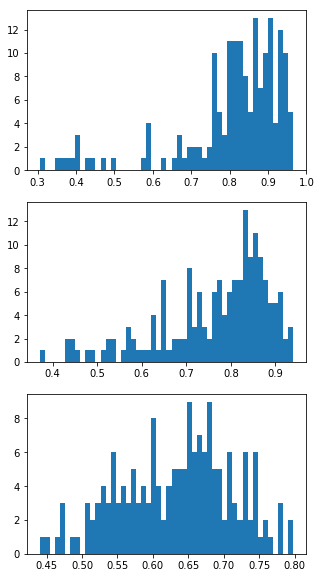

In [13]:
fig, ax = plt.subplots(3, figsize=(5,10))
ax[0].hist(sum1,bins = 50)
ax[1].hist(sum2,bins = 50)
ax[2].hist(sum3,bins = 50)

In [14]:
print np.average(sum1)
print np.average(sum2)
print np.average(sum3)

0.807387678715
0.764846989451
0.634001064732


In [15]:
#调用一次，计算其中一个性状 一折中出现过得sample的pcc  然后多折相加即可
def calculate_sample_pcc(trait,i):
    namess = table.flatten()
    count = np.zeros([4750,])
    pcc= np.zeros([4750,])
    pcc[np.isin(namess,f[str(i)+'/s1f'][:])] = table_(i)['gpr'][trait]['pcc_test_m']
    pcc[np.isin(namess,f[str(i)+'/s1m'][:])] = table_(i)['gpr'][trait]['pcc_test_f']
    pcc[np.isin(namess,f[str(i)+'/s0'][:])] = table_(i)['gpr'][trait]['pcc_test_fm']
    count[np.isin(namess,f[str(i)+'/test'][:])] = 1
    return pcc,count

In [16]:
count_trait1 = np.zeros([4750,])
pcc_trait1 = np.zeros([4750,])
for i in range(100):
    pcc,count = calculate_sample_pcc('trait1',i)
    count_trait1 +=count
    pcc_trait1+=pcc

In [17]:
pcc_trait1_ave = np.zeros([4750,])
pcc_trait1_ave[np.where(count_trait1 !=0)] = pcc_trait1[np.where(count_trait1 !=0)] / count_trait1[np.where(count_trait1 !=0)]
pcc_trait1_ave[np.where(count_trait1 ==0)] = np.nan

(array([   2.,    2.,    5.,    4.,    7.,   20.,   12.,   22.,   24.,
          24.,   28.,   17.,   30.,   19.,   26.,   59.,   43.,   56.,
         128.,  125.,  143.,  147.,  222.,  147.,  252.,  218.,  240.,
         174.,  157.,   93.,   85.,  107.,  135.,  165.,  195.,  175.,
         173.,  174.,  196.,  200.,  151.,  120.,   78.,   27.,   13.,
          10.,   34.,   75.,   49.,   13.]),
 array([ 0.67549526,  0.67965212,  0.68380897,  0.68796582,  0.69212267,
         0.69627952,  0.70043638,  0.70459323,  0.70875008,  0.71290693,
         0.71706378,  0.72122064,  0.72537749,  0.72953434,  0.73369119,
         0.73784805,  0.7420049 ,  0.74616175,  0.7503186 ,  0.75447545,
         0.75863231,  0.76278916,  0.76694601,  0.77110286,  0.77525972,
         0.77941657,  0.78357342,  0.78773027,  0.79188712,  0.79604398,
         0.80020083,  0.80435768,  0.80851453,  0.81267139,  0.81682824,
         0.82098509,  0.82514194,  0.82929879,  0.83345565,  0.8376125 ,
         0.84176

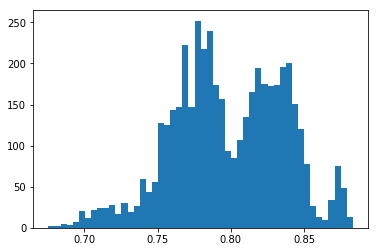

In [18]:
hist(pcc_trait1_ave[np.isnan(pcc_trait1_ave) == 0],bins = 50)

In [56]:
pcc_trait1_ave.shape

(4750,)

In [53]:
table

array([['L0000', 'L0001', 'L0002', ..., 'L10000', 'L10000', 'L10000'],
       ['L0191', 'L0192', 'L0193', ..., 'L10000', 'L10000', 'L10000'],
       ['L0380', 'L0381', 'L0382', ..., 'L0442', 'L10000', 'L10000'],
       ..., 
       ['L4183', 'L4184', 'L4185', ..., 'L4248', 'L4264', 'L10000'],
       ['L4375', 'L4376', 'L4377', ..., 'L10000', 'L10000', 'L10000'],
       ['L4564', 'L4565', 'L4566', ..., 'L10000', 'L10000', 'L10000']],
      dtype='|S22')

In [ ]:
pred_matrix = np.full(25*190, np.nan)
pred_matrix[index_test] = np.ravel(normalize_phenotype(y_mean[trait].val))
pred_matrix = np.take(pred_matrix, parent_table)

In [57]:
pred_matrix = np.full(25*190, np.nan)

In [62]:
pred_matrix= pcc_trait1_ave

In [63]:
np.take(pred_matrix, parent_table)

IndexError: index 4754 is out of bounds for size 4750

In [ ]:
def normalize_phenotype(x, range_pheno=4.0):
    return (np.clip(x, -range_pheno, range_pheno) + range_pheno)/2.0/range_pheno
for trait in traits:
    pred_matrix = np.full(phenotypes.shape[0], np.nan)
    pred_matrix[index_test] = np.ravel(normalize_phenotype(y_mean[trait].val))
    pred_matrix = np.take(pred_matrix, parent_table)

    fig, ax = subplots(2, 1, figsize=(16, 6))
    ax[0].matshow(np.take(np.ravel(normalize_phenotype(phenotypes[trait].values)), parent_table), cmap=cm.RdBu_r)
    ax[0].set_title('Phenotypes of training data (%s)'%trait)

    ax[1].matshow(pred_matrix, cmap=cm.RdBu_r)
    ax[1].set_title('Prediction on test data (%s)'%trait)